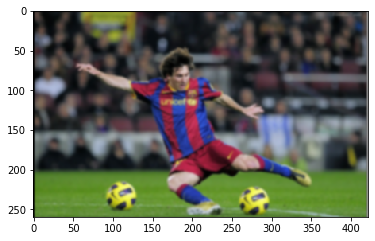

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = np.array(Image.open(r'C:\Users\Attari2\Downloads\roi_input.png'))

gaussian_blurr=np.array([[1,  4,  6,  4, 1],
                         [4, 16, 24, 16, 4],
                         [6, 24, 36, 24, 6],
                         [4, 16, 24, 16, 4],
                         [1,  4,  6,  4, 1]])/256

def convolve3d(image, kernel):
    result = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0]+kernel.shape[0]-1,image.shape[1] + kernel.shape[1]-1,image.shape[2]))
    image_padded[kernel.shape[0]-2:-1:,kernel.shape[1]-2:-1:,:] = image
    image_padded[0,0,:]=image[0,0,:]
    image_padded[-1,-1,:]=image[-1,-1,:]
    
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            for z in range(image.shape[2]):
                summation=(kernel * image_padded[y: y+kernel.shape[0], x: x+kernel.shape[1],z]).sum()
                result[y, x,z]=summation
    
    if image.shape[2]==4:
        result[:,:,3]=image[:,:,3]
    return result

def create_circular_mask(h, w, center=[964,1110], radius=85):
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((Y - center[0])**2 + (X-center[1])**2)
    mask = dist_from_center <= radius
    return mask

im=convolve3d(im,gaussian_blurr)
mask=create_circular_mask(im.shape[0],im.shape[1])
masked=im.copy()
masked[~mask]=0
row_shift=-25
column_shift=-670
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if  masked[i,j,:].all() !=0:
            masked[i+row_shift,j+column_shift,:]=masked[i,j,:]
            masked[i,j,:]=0
            im[i+row_shift,j+column_shift,:]=0

im=np.bitwise_or(im,masked)
pil_img=Image.fromarray(im.astype(np.uint8))
plt.imshow(im)